In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize':(7.7, 5.25)})

## Data Cleaning

In [3]:
df=pd.read_csv('C:/Users/tanis/Documents/C1/llcp2021.csv', usecols=['_PRACE1','_HISPANC','_SEX', '_AGEG5YR','_EDUCAG','INCOME3', '_BMI5','_BMI5CAT'])

# Exclude the rows for these columns have null values
df = df.dropna(subset=['_BMI5','_BMI5CAT','_PRACE1','_HISPANC', 'INCOME3', '_EDUCAG'])

#Exclude the rows where _AGE5YR = 14
df=df[df._AGEG5YR != 14]
df['_BMI5'] = df['_BMI5'].div(100).round(2)


In [4]:
df.shape

(387015, 8)

In [5]:
df.describe()

,INCOME3,_PRACE1,_HISPANC,_SEX,_AGEG5YR,_BMI5,_BMI5CAT,_EDUCAG
count,387015.000000,387015.000000,387015.000000,387015.000000,387015.000000,387015.000000,387015.000000,387015.000000
mean,20.597845,3.383068,1.979502,1.515688,7.622857,28.568045,3.010180,3.053525
std,31.118084,13.248015,0.729693,0.499754,3.563130,6.558789,0.833213,0.981441
min,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000
25%,6.000000,1.000000,2.000000,1.000000,5.000000,24.140000,2.000000,2.000000
50%,7.000000,1.000000,2.000000,2.000000,8.000000,27.440000,3.000000,3.000000
75%,10.000000,1.000000,2.000000,2.000000,11.000000,31.750000,4.000000,4.000000
max,99.000000,99.000000,9.000000,2.000000,13.000000,99.330000,4.000000,9.000000


In [6]:
# Drop 'missing' and 'do not know values' for _EDUCAG, INCOME3, _HISPANC and _PRACE1 columns
df = df[df["_EDUCAG"] != 9]
df = df[(df["INCOME3"] != 77) & (df["INCOME3"] != 99)]
df = df[(df["_PRACE1"] != 77) & (df["_PRACE1"] != 99)]
df = df[df["_HISPANC"] != 9]

In [7]:
#df.head(60)
df.describe()

,INCOME3,_PRACE1,_HISPANC,_SEX,_AGEG5YR,_BMI5,_BMI5CAT,_EDUCAG
count,313684.000000,313684.000000,313684.000000,313684.000000,313684.000000,313684.000000,313684.000000,313684.000000
mean,6.739901,1.407617,1.922655,1.509044,7.533231,28.739945,3.033693,3.083638
std,2.413826,1.105737,0.267139,0.499919,3.471363,6.571754,0.829194,0.927008
min,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000
25%,5.000000,1.000000,2.000000,1.000000,5.000000,24.310000,2.000000,2.000000
50%,7.000000,1.000000,2.000000,2.000000,8.000000,27.460000,3.000000,3.000000
75%,9.000000,1.000000,2.000000,2.000000,10.000000,31.930000,4.000000,4.000000
max,11.000000,8.000000,2.000000,2.000000,13.000000,99.330000,4.000000,4.000000


In [43]:
ndf=df.replace({'_PRACE1': {1:'White', 
                            2:'Black or African American', 
                            3:'American Indian or Alaskan Native', 
                            4:'Asian',
                            5:'Native Hawaiian or other Pacific Islander',
                            6:'Other race',
                            7:'No preferred race', 
                            8:'Multiracial but preferred race not answered'},
                '_HISPANC':{1:'Hispanic, Latino/a, or Spanish origin', 
                            2:'Not of Hispanic, Latino/a, or Spanish origin'}, 
                '_SEX':{1:'Male', 
                        2:'Female'}, 
                '_AGEG5YR':{1:'Age 18 to 24', 
                            2:'Age 25 to 29', 
                            3:'Age 30 to 34', 
                            4:'Age 35 to 39',
                            5:'Age 40 to 44', 
                            6:'Age 45 to 49',
                            7:'Age 50 to 54',
                            8:'Age 55 to 59',
                            9:'Age 60 to 64', 
                            10:'Age 65 to 69', 
                            11:'Age 70 to 74', 
                            12:'Age 75 to 79',
                            13:'Age 80 or older'}, 
                '_EDUCAG':{1:'Did not graduate High School', 
                           2:'Graduated High School',
                           3:'Attended College or Technical School', 
                           4:'Graduated from College or Technical School'},
               'INCOME3': {1:"Less than $10,000", 
                           2:"$10,000 to < $15,000", 
                           3:"$15,000 to < $20,000",
                           4:"$20,000 to < $25,000", 
                           5:"$25,000 to < $35,000", 
                           6:"$35,000 to < $50,000", 
                           7:"$50,000 to < $75,000", 
                           8:"$75,000 to < $100,000", 
                           9:"$100,000 to < $150,000", 
                           10:"$150,000 to < $200,000",
                           11:"$200,000 or more"}})

In [44]:
ndf.to_csv('C:/Users/tanis/Documents/C1/clean_2021.csv')

## Histograph showing BMI in relation to Sex

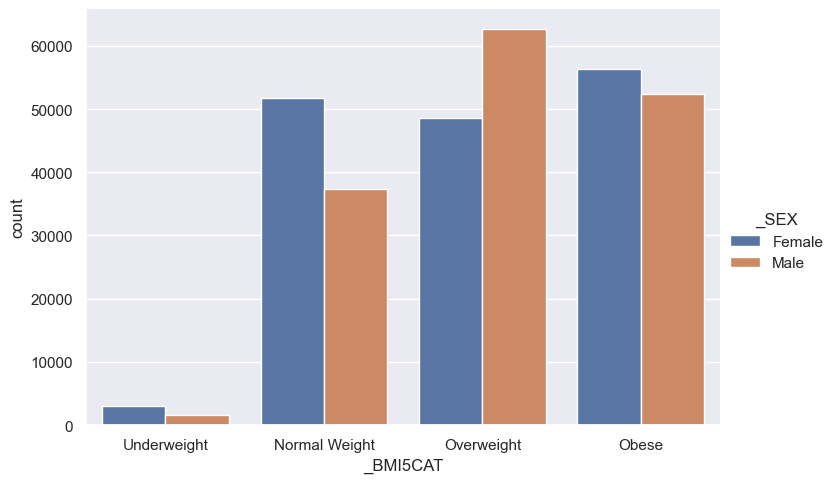

In [68]:
#ndf=sns.load_dataset("ndf")
sns.catplot(data=ndf.replace({'_BMI5CAT':{1:'Underweight', 2:'Normal Weight', 3:'Overweight', 4:'Obese'}}), 
             x='_BMI5CAT', hue="_SEX", order= ['Underweight','Normal Weight','Overweight','Obese'], kind="count", aspect=1.5)


In [11]:
ndf.head()

,INCOME3,_PRACE1,_HISPANC,_SEX,_AGEG5YR,_BMI5,_BMI5CAT,_EDUCAG
0,"$25,000 to < $35,000",White,"Not of Hispanic, Latino/a, or Spanish origin",Female,Age 70 to 74,14.54,1.0,Graduated High School
2,"$15,000 to < $20,000",Black or African American,"Not of Hispanic, Latino/a, or Spanish origin",Female,Age 70 to 74,28.29,3.0,Graduated High School
3,"$50,000 to < $75,000",White,"Not of Hispanic, Latino/a, or Spanish origin",Female,Age 60 to 64,33.47,4.0,Graduated High School
4,"$20,000 to < $25,000",White,"Not of Hispanic, Latino/a, or Spanish origin",Male,Age 75 to 79,28.73,3.0,Did not graduate High School
5,"$35,000 to < $50,000",White,"Not of Hispanic, Latino/a, or Spanish origin",Male,Age 80 or older,24.37,2.0,Attended College or Technical School


## Boxplot showing Obesity in relation to income levels

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

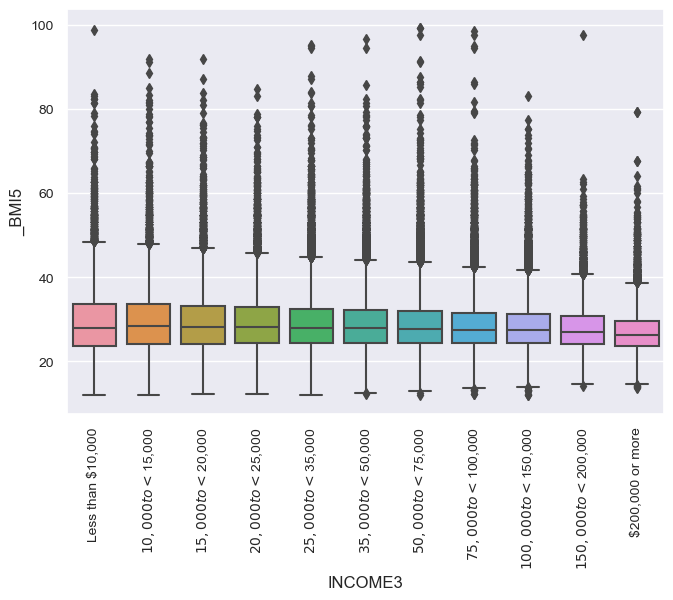

In [57]:
sns.boxplot(x='INCOME3', y='_BMI5', data=ndf, order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"])
plt.xticks(rotation=90, size=10)
plt.yticks(size=10)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5')])

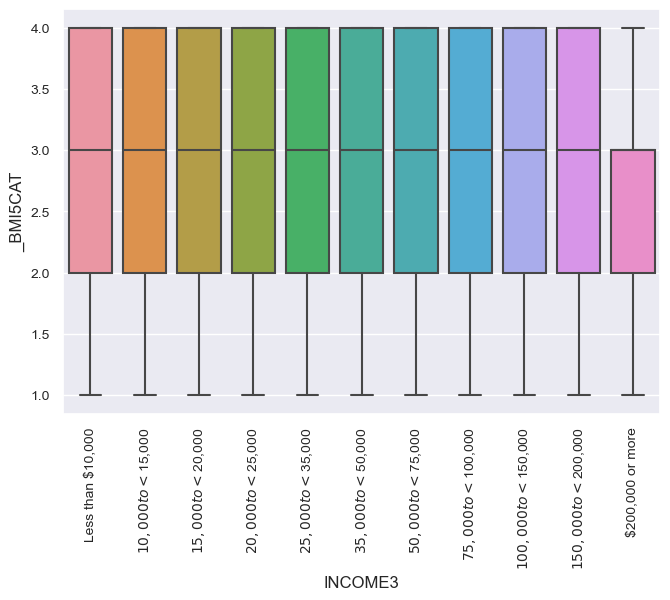

In [58]:
sns.boxplot(x='INCOME3', y='_BMI5CAT', data=ndf, order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"])
plt.xticks(rotation=90, size=10)
plt.yticks(size=10)

## Histograph showing income levels

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000')])

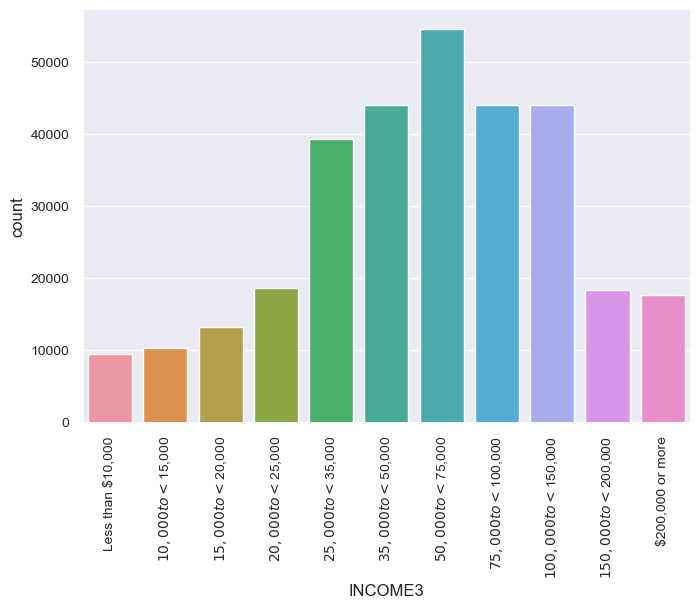

In [75]:
sns.catplot(data=ndf, x='INCOME3', order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"], kind='count', aspect=1.5)

plt.xticks(rotation=90, size=10)
plt.yticks(size=10)

## BMI in relation to income levels

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Less than $10,000'),
  Text(1, 0, '$10,000 to < $15,000'),
  Text(2, 0, '$15,000 to < $20,000'),
  Text(3, 0, '$20,000 to < $25,000'),
  Text(4, 0, '$25,000 to < $35,000'),
  Text(5, 0, '$35,000 to < $50,000'),
  Text(6, 0, '$50,000 to < $75,000'),
  Text(7, 0, '$75,000 to < $100,000'),
  Text(8, 0, '$100,000 to < $150,000'),
  Text(9, 0, '$150,000 to < $200,000'),
  Text(10, 0, '$200,000 or more')])

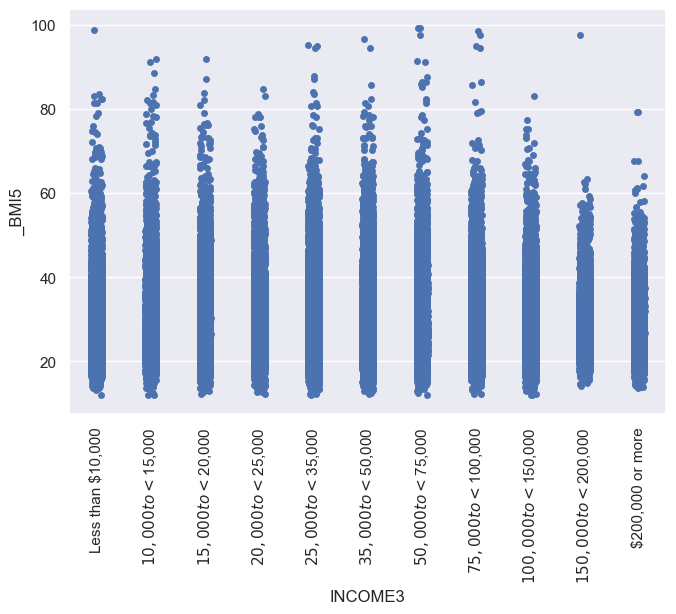

In [15]:
sns.stripplot(y='_BMI5', x='INCOME3', data=ndf, order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"])
plt.xticks(rotation=90)


## BMI in relation to age and education

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Age 70 to 74'),
  Text(1, 0, 'Age 60 to 64'),
  Text(2, 0, 'Age 75 to 79'),
  Text(3, 0, 'Age 80 or older'),
  Text(4, 0, 'Age 65 to 69'),
  Text(5, 0, 'Age 50 to 54'),
  Text(6, 0, 'Age 45 to 49'),
  Text(7, 0, 'Age 18 to 24'),
  Text(8, 0, 'Age 55 to 59'),
  Text(9, 0, 'Age 35 to 39'),
  Text(10, 0, 'Age 30 to 34'),
  Text(11, 0, 'Age 40 to 44'),
  Text(12, 0, 'Age 25 to 29')])

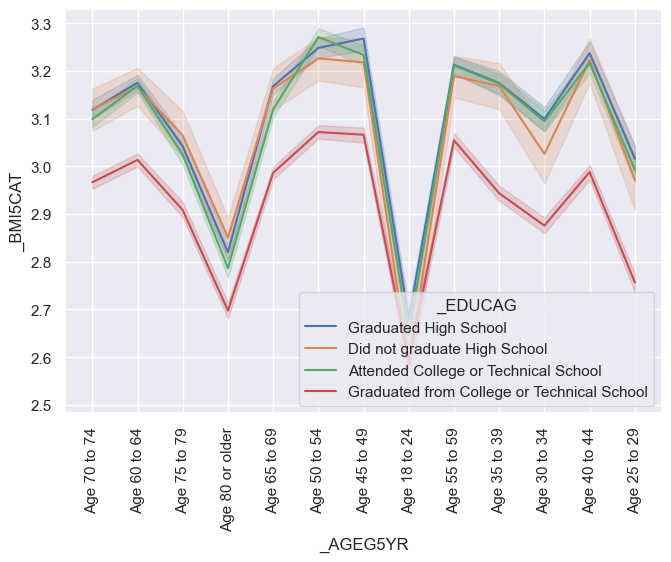

In [78]:
sns.lineplot(data=ndf, x='_AGEG5YR', y='_BMI5CAT', legend= 'auto', hue='_EDUCAG',)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Age 70 to 74'),
  Text(1, 0, 'Age 60 to 64'),
  Text(2, 0, 'Age 75 to 79'),
  Text(3, 0, 'Age 80 or older'),
  Text(4, 0, 'Age 65 to 69'),
  Text(5, 0, 'Age 50 to 54'),
  Text(6, 0, 'Age 45 to 49'),
  Text(7, 0, 'Age 18 to 24'),
  Text(8, 0, 'Age 55 to 59'),
  Text(9, 0, 'Age 35 to 39'),
  Text(10, 0, 'Age 30 to 34'),
  Text(11, 0, 'Age 40 to 44'),
  Text(12, 0, 'Age 25 to 29')])

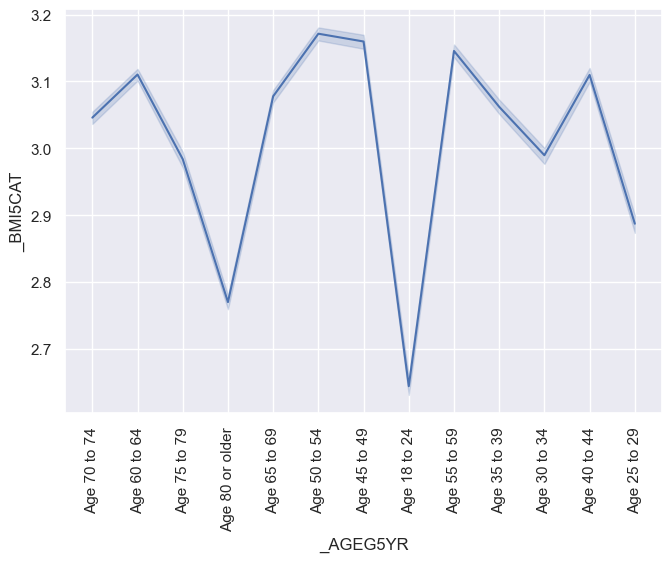

In [90]:
sns.lineplot(data=ndf, x='_AGEG5YR', y='_BMI5CAT', legend= 'auto')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Less than $10,000'),
  Text(1, 0, '$10,000 to < $15,000'),
  Text(2, 0, '$15,000 to < $20,000'),
  Text(3, 0, '$20,000 to < $25,000'),
  Text(4, 0, '$25,000 to < $35,000'),
  Text(5, 0, '$35,000 to < $50,000'),
  Text(6, 0, '$50,000 to < $75,000'),
  Text(7, 0, '$75,000 to < $100,000'),
  Text(8, 0, '$100,000 to < $150,000'),
  Text(9, 0, '$150,000 to < $200,000'),
  Text(10, 0, '$200,000 or more')])

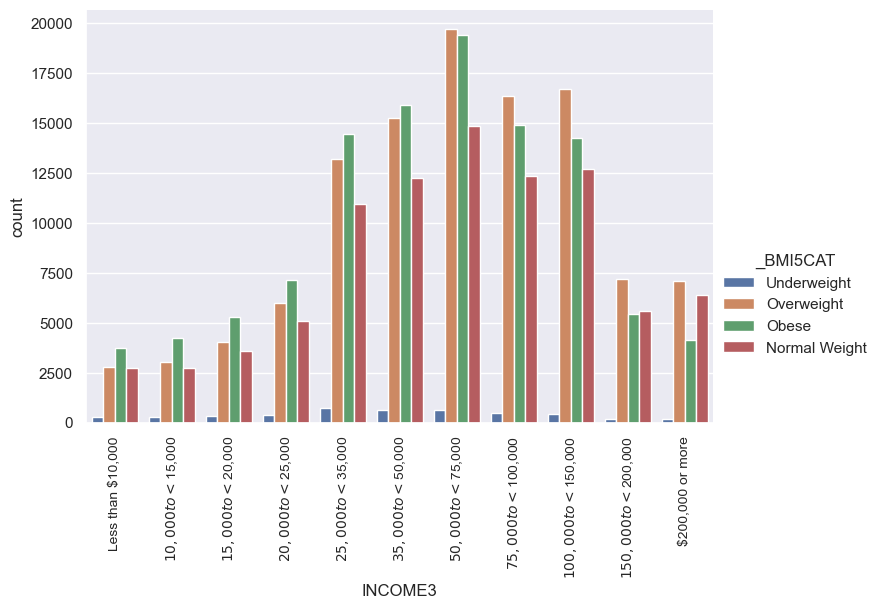

In [82]:
sns.catplot(data=ndf.replace({'_BMI5CAT':{1:'Underweight', 2:'Normal Weight', 3:'Overweight', 4:'Obese'}}),
            order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"], x='INCOME3', hue="_BMI5CAT", kind="count", aspect=1.5)
plt.xticks(rotation=90, size=10)


## BMI in relation to income

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '$25,000 to < $35,000'),
  Text(1, 0, '$15,000 to < $20,000'),
  Text(2, 0, '$50,000 to < $75,000'),
  Text(3, 0, '$20,000 to < $25,000'),
  Text(4, 0, '$35,000 to < $50,000'),
  Text(5, 0, '$75,000 to < $100,000'),
  Text(6, 0, 'Less than $10,000'),
  Text(7, 0, '$10,000 to < $15,000'),
  Text(8, 0, '$100,000 to < $150,000'),
  Text(9, 0, '$150,000 to < $200,000'),
  Text(10, 0, '$200,000 or more')])

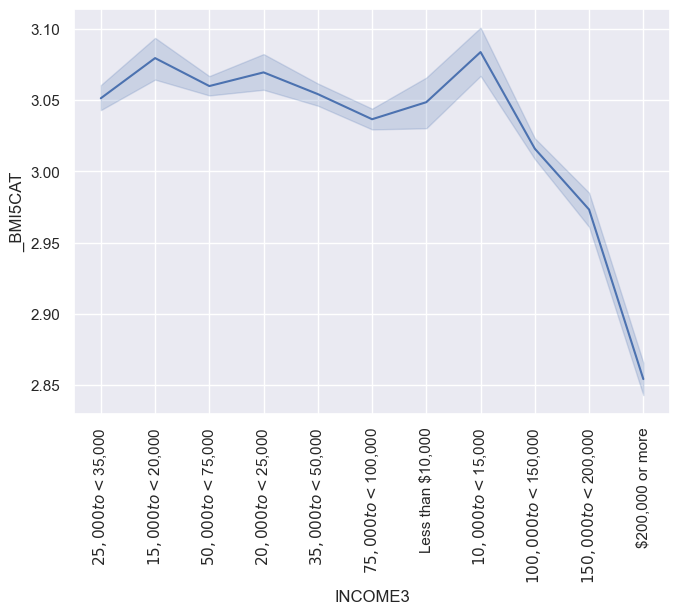

In [84]:
sns.lineplot(data=ndf, x='INCOME3', y='_BMI5CAT')
plt.xticks(rotation=90)


## BMI in relation to race

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'American Indian or Alaskan Native'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Native Hawaiian or other Pacific Islander'),
  Text(5, 0, 'Other race'),
  Text(6, 0, 'No preferred race'),
  Text(7, 0, 'Multiracial but preferred race not answered')])

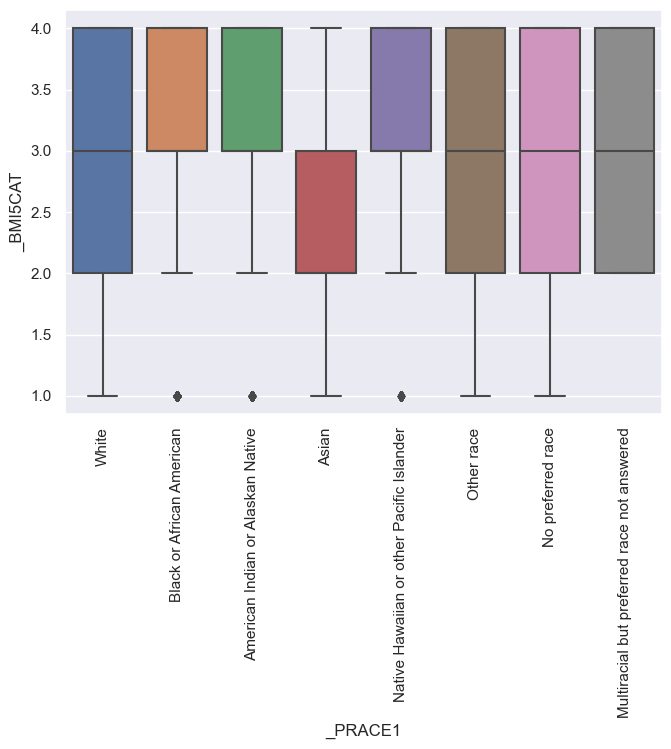

In [88]:
sns.boxplot(y='_BMI5CAT', x='_PRACE1', data=ndf, order=['White', 
                            'Black or African American', 
                            'American Indian or Alaskan Native', 
                            'Asian',
                            'Native Hawaiian or other Pacific Islander',
                            'Other race',
                            'No preferred race', 
                            'Multiracial but preferred race not answered'])
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'American Indian or Alaskan Native'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Native Hawaiian or other Pacific Islander'),
  Text(5, 0, 'Other race'),
  Text(6, 0, 'No preferred race'),
  Text(7, 0, 'Multiracial but preferred race not answered')])

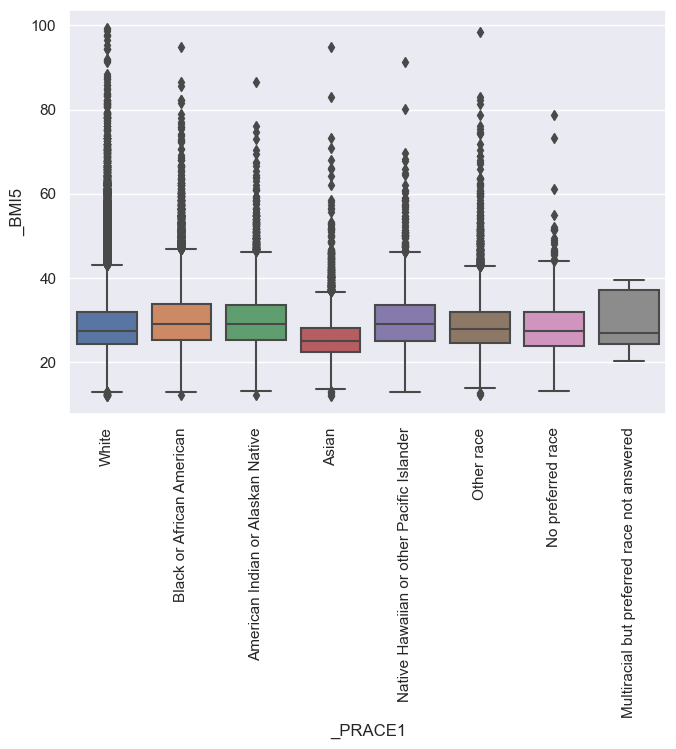

In [89]:
sns.boxplot(y='_BMI5', x='_PRACE1', data=ndf, order=['White', 
                            'Black or African American', 
                            'American Indian or Alaskan Native', 
                            'Asian',
                            'Native Hawaiian or other Pacific Islander',
                            'Other race',
                            'No preferred race', 
                            'Multiracial but preferred race not answered'])
plt.xticks(rotation=90)

## Correlation diagram with _BMI5 and _BMI5CAT

<Axes: >

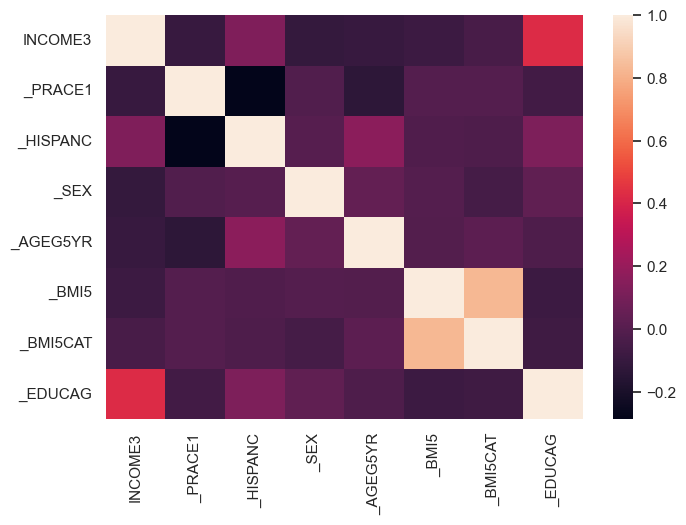

In [21]:
sns.heatmap(df.corr())

<Axes: >

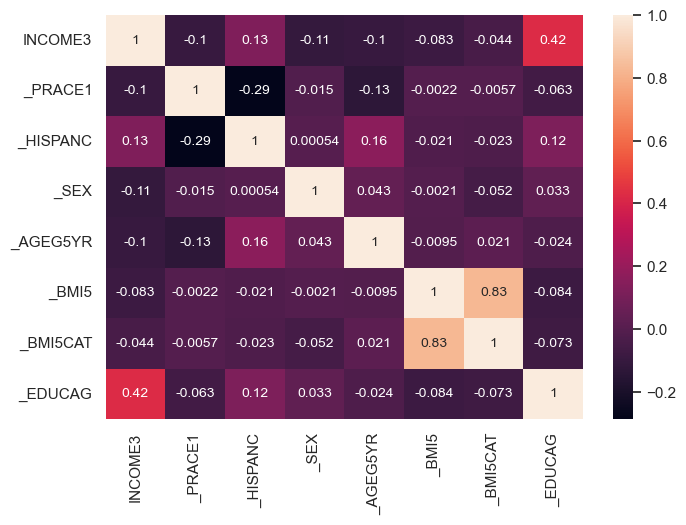

In [22]:
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10})

## Correlation diagram with _BMI5CAT

<Axes: >

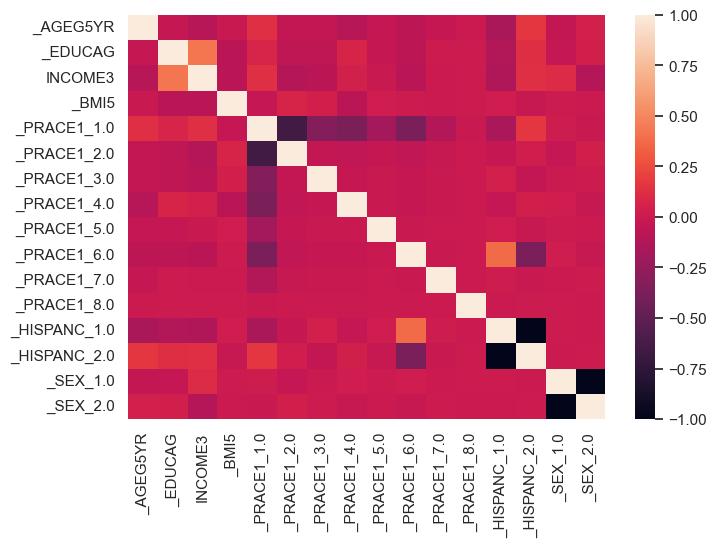

In [34]:
c_df= df[['_PRACE1','_HISPANC','_SEX', '_AGEG5YR','_EDUCAG','INCOME3','_BMI5']]
c_df=pd.get_dummies(data=c_df, columns=['_PRACE1','_HISPANC','_SEX'])
sns.heatmap(c_df.corr(), annot=False, annot_kws={'size':10}) 

In [96]:
##  Logistic Regression
log_df=pd.read_csv('C:/Users/tanis/Documents/C1/encoded_llcp2021.csv')
log_df=log_df.drop(columns=['Unnamed:0','_BMI5CAT', 'Division','_BMI5'])


log_df.describe()


KeyError: "['Unnamed:0'] not found in axis"